## Import Necessary Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

## Increase display Width ##

In [9]:
pd.set_option('display.width', 2000)  # Set a wider display width
pd.set_option('display.max_colwidth', None)  # Allow full column content display

## Load the Data

In [12]:
# List of filenames to compare
file_names = [
    'tests/online/logs/test_results_CLAUDE_HAIKU_30k_2024-05-08_12-50-40.csv',
    'tests/online/logs/test_results_chatGPT_30k_2024-05-08_13-07-55.csv',
    'tests/online/logs/test_results_chatGPT_trained_2024-05-08_13-12-56.csv'
    # Add more file paths as needed
]
labels = ["CLAUDE_HAIKU", "chatGPT_untrained", "chatGPT_trained"]  # Corresponding labels for the files

# Load each file into a DataFrame, stripping percentage signs and converting to float
dataframes = []
for i, (file, label) in enumerate(zip(file_names, labels)):
    df = pd.read_csv(file)
    df['Score Percentage'] = df['Score Percentage'].str.rstrip('%').astype(float)
    # Rename all columns except 'Task' to have a unique suffix
    df.rename(columns={col: f"{col}_{label}" for col in df.columns if col != 'Task'}, inplace=True)
    dataframes.append(df)

# Merge all dataframes on 'Task'
from functools import reduce
df_merged = reduce(lambda left, right: pd.merge(left, right, on='Task'), dataframes)
print(df_merged.head())


  Test Name_CLAUDE_HAIKU                                                            Task  Attempt_CLAUDE_HAIKU  Score_CLAUDE_HAIKU  Total_CLAUDE_HAIKU  Score Percentage_CLAUDE_HAIKU Test Name_chatGPT_untrained  Attempt_chatGPT_untrained  Score_chatGPT_untrained  Total_chatGPT_untrained  Score Percentage_chatGPT_untrained Test Name_chatGPT_trained  Attempt_chatGPT_trained  Score_chatGPT_trained  Total_chatGPT_trained  Score Percentage_chatGPT_trained
0        Test for online              click on Haustierprodukte and choose Hundeprodukte                     1                   0                   3                            0.0             Test for online                          1                        2                        3                           66.666667           Test for online                        1                      0                      3                          0.000000
1        Test for online                                         search for blaue Socken    

## Data Analysis

Average score percentage for CLAUDE_HAIKU: 46.388888888888886%
Average score percentage for chatGPT_untrained: 48.194444444444436%
Average score percentage for chatGPT_trained: 25.138888888888886%


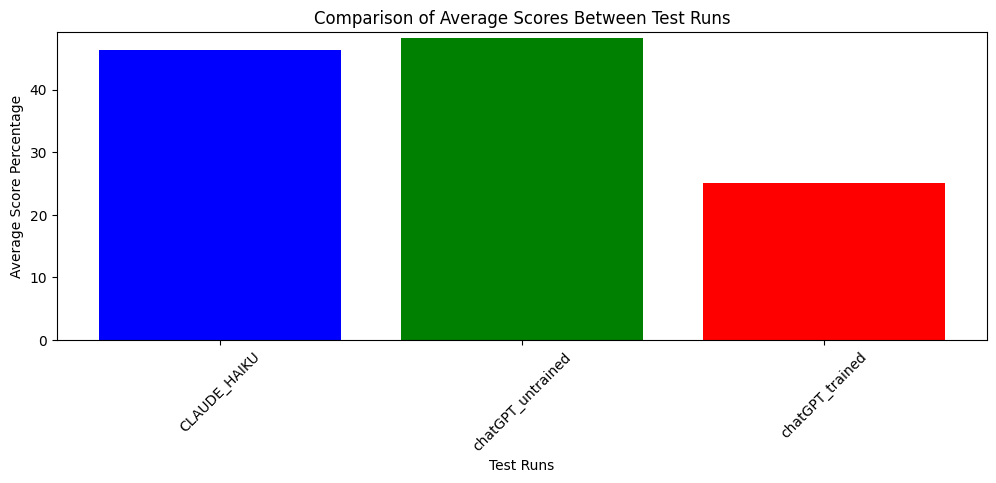

In [13]:
import matplotlib.pyplot as plt

# Calculate average scores for each run and add to a new DataFrame for plotting
average_scores = []
for df, label in zip(dataframes, labels):
    avg_score = df['Score Percentage_'+label].mean()
    average_scores.append(avg_score)
    print(f"Average score percentage for {label}: {avg_score}%")

# Plotting the average scores
plt.figure(figsize=(12, 4))
plt.bar(labels, average_scores, color=[
    'blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 
    'lime', 'pink', 'teal', 'lavender', 'brown', 'olive', 'gray', 
    'maroon', 'navy'
])  # Add more colors if more runs
plt.xlabel('Test Runs')
plt.ylabel('Average Score Percentage')
plt.title('Comparison of Average Scores Between Test Runs')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.ylim(0, max(average_scores) + 1)
plt.show()

## Visual Comparison

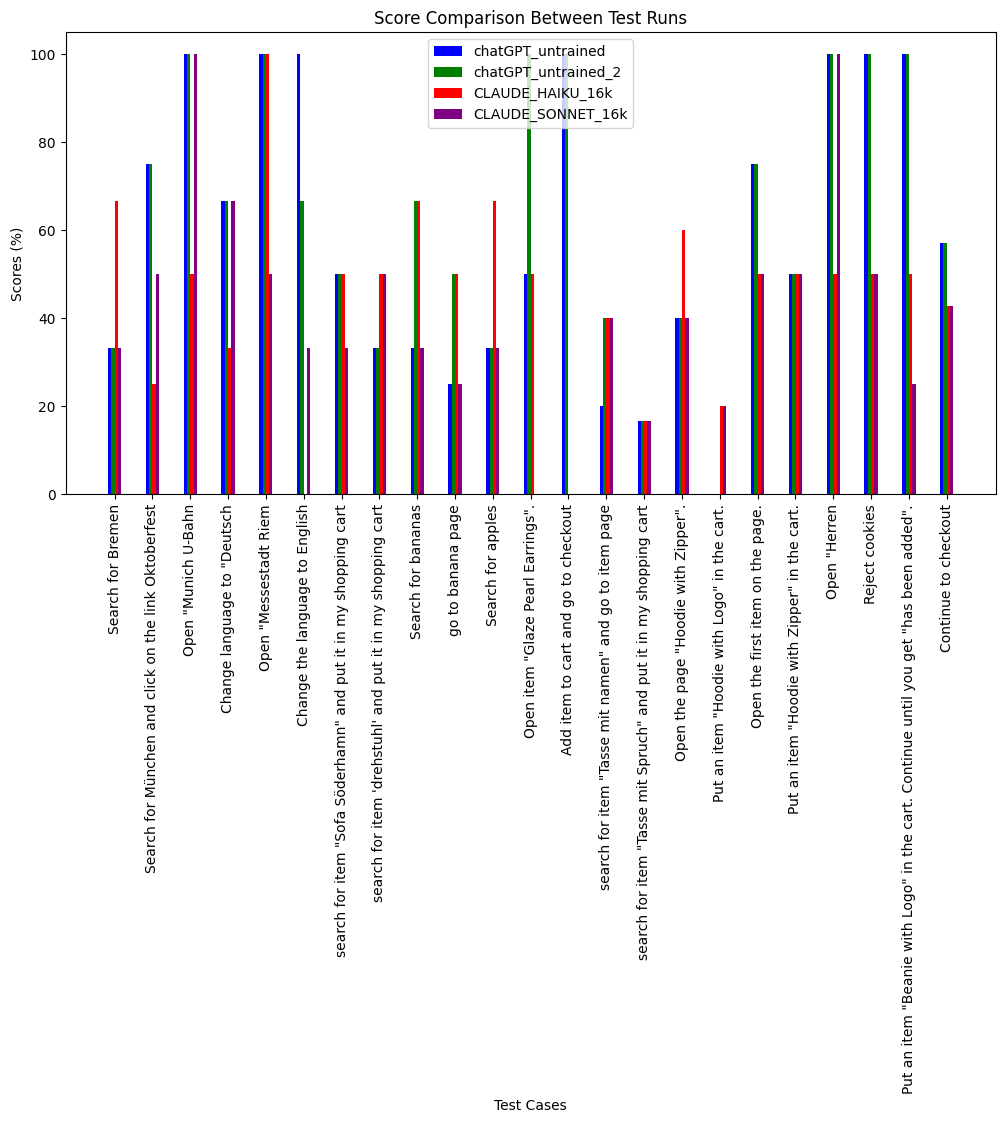

In [78]:
# Plot all dataframes together for detailed comparison
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35 / len(dataframes)  # Adjust bar width based on the number of dataframes
indices = range(len(dataframes[0]))  # Assume all dataframes have the same 'Task' length

colors = [
    'blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 
    'lime', 'pink', 'teal', 'lavender', 'brown', 'olive', 'gray', 
    'maroon', 'navy'
]  # Extend this list for more files
for i, (df, label, color) in enumerate(zip(dataframes, labels, colors)):
    ax.bar([p + bar_width * i for p in indices], df['Score Percentage_'+label], bar_width, label=label, color=color)

ax.set_xlabel('Test Cases')
ax.set_ylabel('Scores (%)')
ax.set_title('Score Comparison Between Test Runs')
ax.set_xticks([p + bar_width * (len(dataframes) - 1) / 2 for p in indices])
ax.set_xticklabels(dataframes[0]['Task'], rotation=90)
ax.legend()

plt.show()